In [1]:
import os
import torch
import torchvision
from torch.utils.data import DataLoader
from utils.Dataset import CustomVOCSegmentation
from utils.Transform import transforms_train
import matplotlib.pyplot as plt
def decode_segmap(masks,colormap):
    r_mask = torch.zeros_like(masks,dtype=torch.uint8)
    g_mask = torch.zeros_like(masks,dtype=torch.uint8)
    b_mask = torch.zeros_like(masks,dtype=torch.uint8)
    for k in range(len(colormap)):
        indices = masks == k
        print(r_mask[indices].shape)
        r_mask[indices] = colormap[k][0]
        g_mask[indices] = colormap[k][1]
        b_mask[indices] = colormap[k][2]
    return torch.cat([r_mask,g_mask,b_mask],dim=1)

root_dir = '.'
# download_pascalvoc(os.path.join(root_dir,'dataset'))
data_dir = os.path.join(root_dir,'dataset','VOCdevkit','VOC2012')

train_dataset = CustomVOCSegmentation(data_dir=data_dir,
                                        image_set="train",
                                        transform=transforms_train())
colormap = CustomVOCSegmentation.colormap
train_loader = DataLoader(train_dataset,batch_size=4,shuffle=True)

tensor([153631.,   4195.,    242.,  27662.,  23314.,  35643.,    372.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,  1708

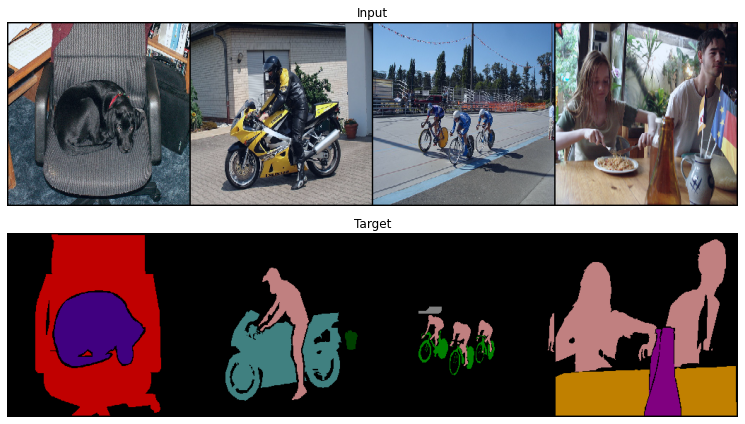

In [2]:
data = next(iter(train_loader))

images,targets = data['input'],data['target']
print(targets.float().histc(min=0,max=256))
print(targets.min(),targets.max())
print(targets.sum())
fig, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].imshow(torchvision.utils.make_grid(images.cpu(), normalize=True).permute(1,2,0))
ax[0].set_title("Input")
ax[0].axis('off')
print(targets.shape)
targets = decode_segmap(targets.unsqueeze(1),colormap)
print(targets.shape)
ax[1].imshow(torchvision.utils.make_grid(targets.cpu()).permute(1,2,0))
ax[1].set_title("Target")
ax[1].axis('off')

fig.tight_layout()
plt.show()
